# Eliminating Outliers

Eliminating outliers is a big topic. There are many different ways to eliminate outliers. A data engineer's job isn't necessarily to decide what counts as an outlier and what does not. A data scientist would determine that. The data engineer would code the algorithms that eliminate outliers from a data set based on any criteria that a data scientist has decided.

In this exercise, you'll write code to eliminate outliers based on the Tukey rule.

Run the code cell below to read in the data and visualize the data.

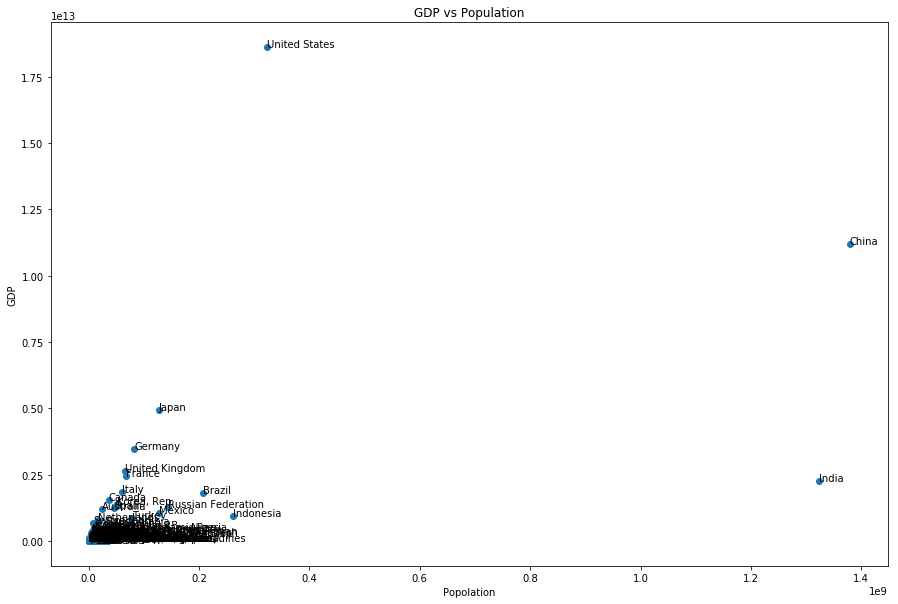

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../data/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('../data/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# plot the data
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('Popolation')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Exercise

Write a function that uses the Tukey rule to eliminate outliers from an array of data.

In [2]:
# TODO: Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

# HINT: Re-use code from the previous exercise

def tukey_rule(data_frame, column_name):

# TODO: Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
    Q1 = data_frame[column_name].quantile(0.25)

# TODO: Calculate the third quartile of the population values
    Q3 = data_frame[column_name].quantile(0.75)

# TODO: Calculate the interquartile range Q3 - Q1
    IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
    outliers = data_frame[(data_frame[column_name] > max_value) | (data_frame[column_name] < min_value)]
    outliers_removed = list(set(data_frame[column_name]) - set(outliers[column_name]))
    data_frame = data_frame[data_frame[column_name].isin(outliers_removed)]
    return data_frame


Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [3]:
# TODO: Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()

In [8]:
df_outlier_removed = tukey_rule(df_outlier_removed, 'gdp')

In [9]:
df_outlier_removed =tukey_rule(df_outlier_removed, 'population')

In [10]:
df_outlier_removed.head()

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0


Run the code cell below to plot the results.

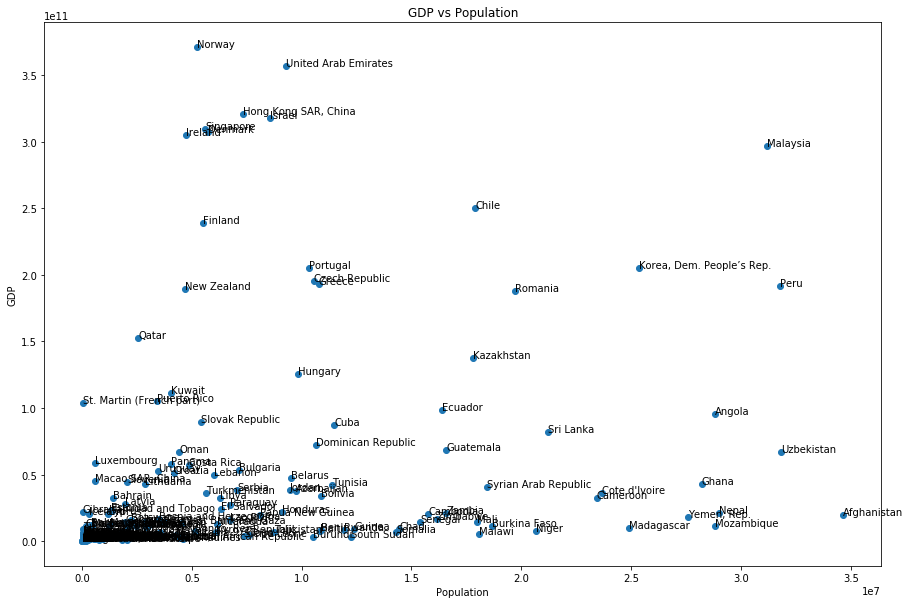

In [11]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('Population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))